In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

## 19.3 Basic forecasting with Prophet 

In [3]:
df = pd.read_csv('../data/daily_min_temp.csv')

df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.tail()

,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


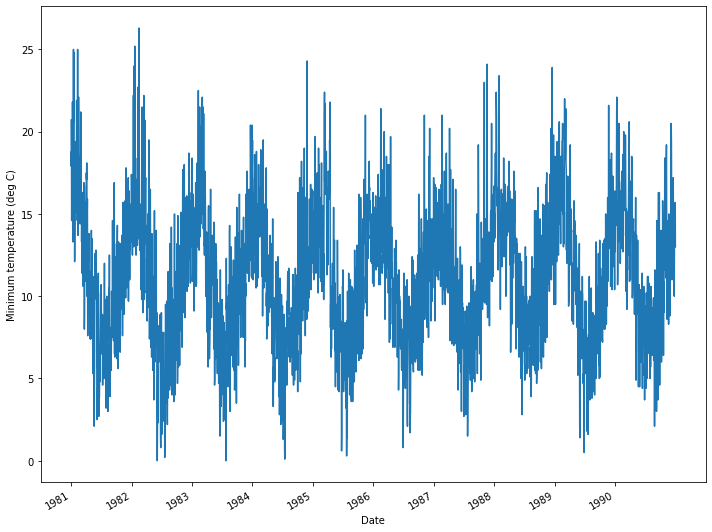

In [5]:
fig, ax = plt.subplots()

ax.plot(df['Temp'])
ax.set_xlabel('Date')
ax.set_ylabel('Minimum temperature (deg C)')

plt.xticks(np.arange(0, 3649, 365), np.arange(1981, 1991, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH19_F01_peixeiro.png', dpi=300)

## Basic forecasting with Prophet

In [6]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [7]:
train = df[:-365]
test = df[-365:]

In [8]:
m = Prophet()

In [9]:
m.fit(train);

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
future = m.make_future_dataframe(periods=365)

In [11]:
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:-360]

,ds,yhat,yhat_lower,yhat_upper
3285,1990-01-01,14.885259,11.435738,18.343159
3286,1990-01-02,15.011734,11.179645,18.331741
3287,1990-01-03,15.088170,11.482210,18.543419
3288,1990-01-04,14.996271,11.293647,18.390055
3289,1990-01-05,15.066565,11.765171,18.642383


In [13]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3645,1990-12-27,11.406616,11.234023,18.037728,11.317184,11.505689,3.043416,3.043416,3.043416,-0.026441,-0.026441,-0.026441,3.069856,3.069856,3.069856,0.0,0.0,0.0,14.450031
3646,1990-12-28,11.406528,11.168300,17.949244,11.316559,11.505902,3.120759,3.120759,3.120759,-0.009965,-0.009965,-0.009965,3.130724,3.130724,3.130724,0.0,0.0,0.0,14.527287
3647,1990-12-29,11.406441,11.235604,18.000363,11.315997,11.506198,3.144845,3.144845,3.144845,-0.048854,-0.048854,-0.048854,3.193699,3.193699,3.193699,0.0,0.0,0.0,14.551286
3648,1990-12-30,11.406353,11.122686,18.122065,11.315449,11.506547,3.069314,3.069314,3.069314,-0.188713,-0.188713,-0.188713,3.258027,3.258027,3.258027,0.0,0.0,0.0,14.475667
3649,1990-12-31,11.406265,11.540265,18.236349,11.314879,11.506889,3.366551,3.366551,3.366551,0.043655,0.043655,0.043655,3.322895,3.322895,3.322895,0.0,0.0,0.0,14.772816


In [14]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

,ds,y,yhat,yhat_lower,yhat_upper
3285,1990-01-01,14.8,14.885259,11.435738,18.343159
3286,1990-01-02,13.3,15.011734,11.179645,18.331741
3287,1990-01-03,15.6,15.088170,11.482210,18.543419
3288,1990-01-04,14.5,14.996271,11.293647,18.390055
3289,1990-01-05,14.3,15.066565,11.765171,18.642383


In [15]:
test['baseline'] = train['y'][-365:].values
test.head()

,ds,y,yhat,yhat_lower,yhat_upper,baseline
3285,1990-01-01,14.8,14.885259,11.435738,18.343159,14.3
3286,1990-01-02,13.3,15.011734,11.179645,18.331741,17.4
3287,1990-01-03,15.6,15.088170,11.482210,18.543419,18.5
3288,1990-01-04,14.5,14.996271,11.293647,18.390055,16.8
3289,1990-01-05,14.3,15.066565,11.765171,18.642383,11.5


In [16]:
from sklearn.metrics import mean_absolute_error

prophet_mae = mean_absolute_error(test['y'], test['yhat'])
baseline_mae = mean_absolute_error(test['y'], test['baseline'])

print(prophet_mae)
print(baseline_mae)

1.9372552489153125
2.8673972602739726


In [23]:
test.iloc[59]

ds            1990-03-01
y                   19.3
yhat           15.469855
yhat_lower     12.062046
yhat_upper     18.962039
baseline            20.4
Name: 3344, dtype: object

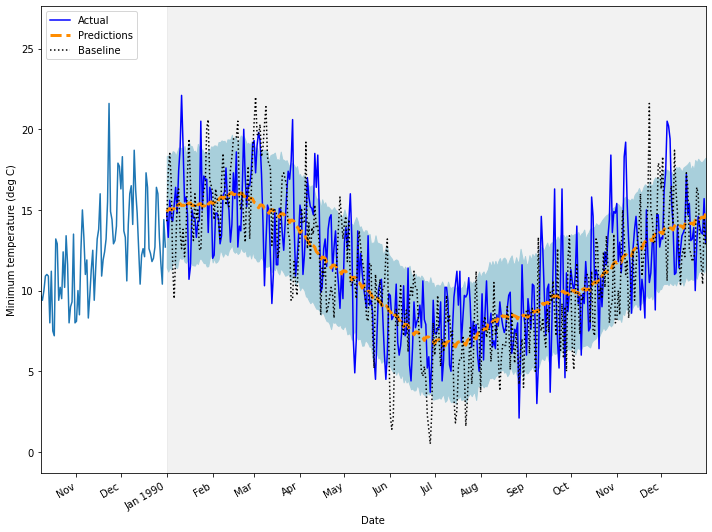

In [25]:
fig, ax = plt.subplots()

ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='Actual')
ax.plot(test['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')
ax.plot(test['baseline'], 'k:', label='Baseline')

ax.set_xlabel('Date')
ax.set_ylabel('Minimum temperature (deg C)')

ax.axvspan(3285, 3649, color='#808080', alpha=0.1)

ax.legend(loc='best')

plt.xticks(
    [3224, 3254, 3285, 3316, 3344, 3375, 3405, 3436, 3466, 3497, 3528, 3558, 3589, 3619],
    ['Nov', 'Dec', 'Jan 1990', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')
plt.xlim(3200, 3649)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH19_F03_peixeiro.png', dpi=300)

## 19.4 Exploring Prophet's advanced functionalities

### 19.4.1 Visualization capabilities

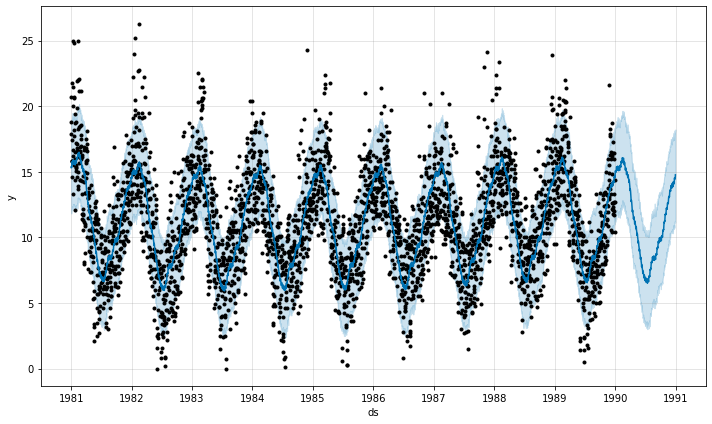

In [26]:
fig1 = m.plot(forecast)

plt.savefig('figures/CH19_F04_peixeiro.png', dpi=300)

#### Plot components 

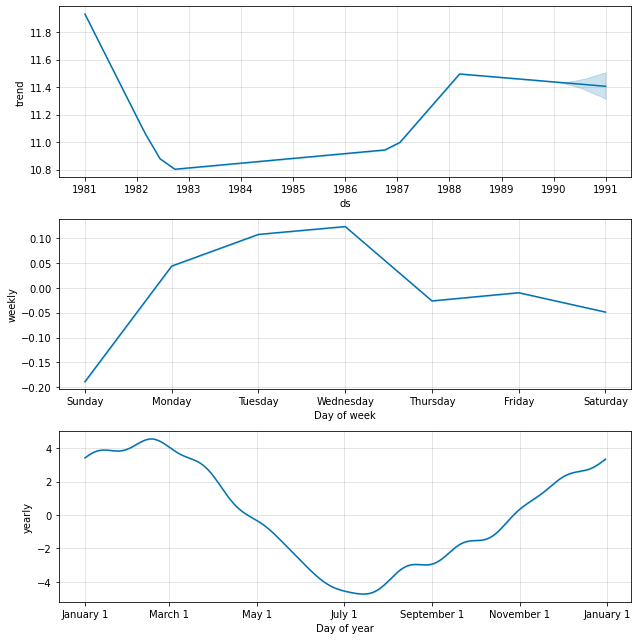

In [27]:
fig2 = m.plot_components(forecast)

plt.savefig('figures/CH19_F05_peixeiro.png', dpi=300)

#### Show trend changepoints 

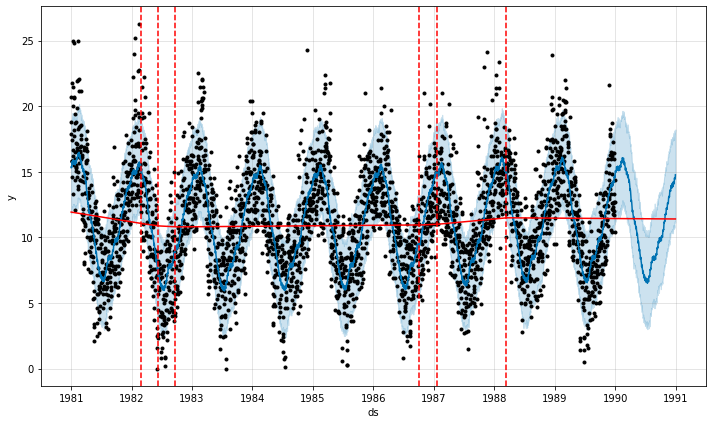

In [28]:
from fbprophet.plot import add_changepoints_to_plot

fig3 = m.plot(forecast)
a = add_changepoints_to_plot(fig3.gca(), m, forecast)

plt.savefig('figures/CH19_F08_peixeiro.png', dpi=300)

#### Plot seasonal components 

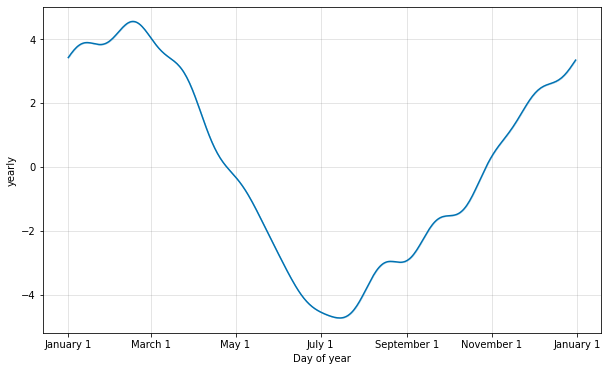

In [29]:
from fbprophet.plot import plot_yearly, plot_weekly

fig4 = plot_yearly(m)

plt.savefig('figures/CH19_F06_peixeiro.png', dpi=300)

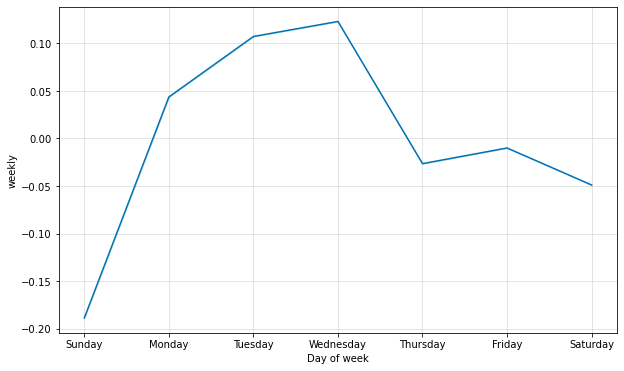

In [30]:
fig5 = plot_weekly(m)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


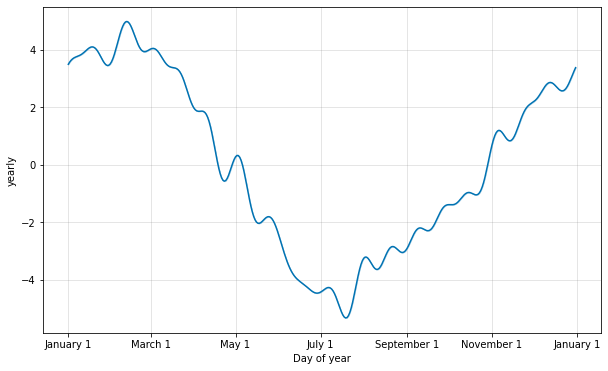

In [31]:
m2 = Prophet(yearly_seasonality=20).fit(train)

fig6 = plot_yearly(m2)

plt.savefig('figures/CH19_F07_peixeiro.png', dpi=300)

### 19.4.2 Cross-validation and performance metrics

In [32]:
from fbprophet.diagnostics import cross_validation

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days', parallel='processes')

df_cv.head()

INFO:fbprophet:Making 13 forecasts with cutoffs between 1983-02-01 00:00:00 and 1988-12-31 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x0000023310D8CD48>


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1983-02-02,15.156298,11.872509,18.720055,17.3,1983-02-01
1,1983-02-03,14.818082,11.316367,18.274931,13.0,1983-02-01
2,1983-02-04,15.212860,12.028766,18.712178,16.0,1983-02-01
3,1983-02-05,15.203778,11.567862,18.585572,14.9,1983-02-01
4,1983-02-06,15.250534,11.524367,18.924580,16.2,1983-02-01


In [33]:
from fbprophet.diagnostics import performance_metrics

df_perf = performance_metrics(df_cv, rolling_window=0)

df_perf.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,1 days,6.350924,2.520104,2.070329,0.147237,0.846154
1,2 days,4.685452,2.164590,1.745606,0.139852,0.846154
2,3 days,10.049956,3.170167,2.661797,0.147149,0.769231
3,4 days,8.686183,2.947233,2.377724,0.195119,0.769231
4,5 days,8.250061,2.872292,2.569552,0.196067,0.615385


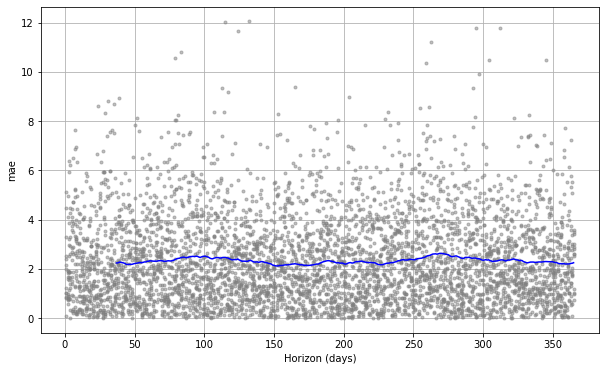

In [34]:
from fbprophet.plot import plot_cross_validation_metric

fig7 = plot_cross_validation_metric(df_cv, metric='mae')

plt.savefig('figures/CH19_F10_peixeiro.png', dpi=300)

### 19.4.3 Hyperparameter tuning 

In [35]:
from itertools import product

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

all_params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

maes = []

for params in all_params:
    m = Prophet(**params).fit(train)
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days', parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    maes.append(df_p['mae'].values[0])
    
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes

tuning_results

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 13 forecasts with cutoffs between 1983-02-01 00:00:00 and 1988-12-31 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002330AF39B88>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 13 forecasts with cutoffs between 1983-02-01 00:00:00 and 1988-12-31 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x000002330B064808>
INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 13 forecasts with cutoffs between 1983-02-01 00:00:00 and 1988-12-31 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.fut

,changepoint_prior_scale,seasonality_prior_scale,mae
0,0.001,0.01,2.307447
1,0.001,0.10,2.313068
2,0.001,1.00,2.347967
3,0.001,10.00,2.342030
4,0.010,0.01,2.240083
5,0.010,0.10,2.278052
6,0.010,1.00,2.282372
7,0.010,10.00,2.285396
8,0.100,0.01,2.725265
9,0.100,0.10,2.344219


In [36]:
best_params = all_params[np.argmin(maes)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}


## 19.5 Implementing a robust forecasting process with Prophet 

### 19.5.1 Forecasting project: Predicting the popularity of "chocolate" searches on Google 

Source: https://trends.google.com/trends/explore?date=all&geo=US&q=chocolate

In [37]:
df = pd.read_csv('../data/monthly_chocolate_search_usa.csv')
df.head()

,month,chocolate
0,2004-01,35
1,2004-02,48
2,2004-03,34
3,2004-04,33
4,2004-05,33


In [38]:
df.tail()

,month,chocolate
211,2021-08,45
212,2021-09,45
213,2021-10,44
214,2021-11,54
215,2021-12,74


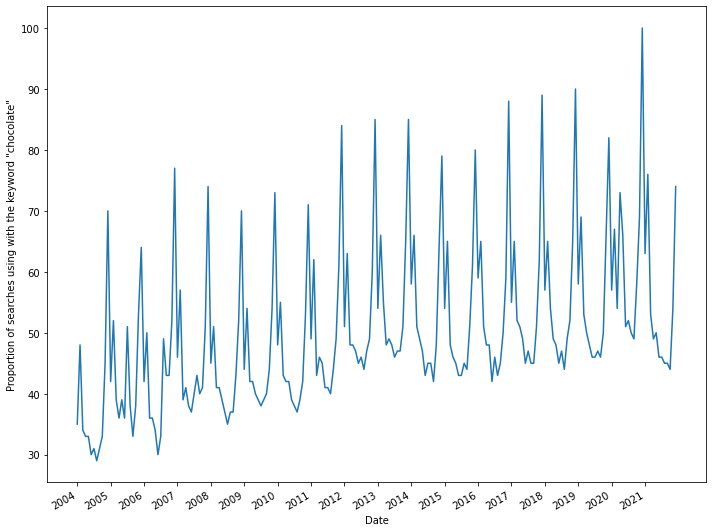

In [39]:
fig, ax = plt.subplots()

ax.plot(df['chocolate'])
ax.set_xlabel('Date')
ax.set_ylabel('Proportion of searches using with the keyword "chocolate"')

plt.xticks(np.arange(0, 215, 12), np.arange(2004, 2022, 1))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH19_F13_peixeiro.png', dpi=300)

In [40]:
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2004-01,35
1,2004-02,48
2,2004-03,34
3,2004-04,33
4,2004-05,33


In [41]:
from pandas.tseries.offsets import MonthEnd

df['ds'] = pd.to_datetime(df['ds']) + MonthEnd(1)

df.head()

,ds,y
0,2004-01-31,35
1,2004-02-29,48
2,2004-03-31,34
3,2004-04-30,33
4,2004-05-31,33


In [42]:
train = df[:-12]
test = df[-12:]

In [43]:
train.tail()

,ds,y
199,2020-08-31,50
200,2020-09-30,49
201,2020-10-31,58
202,2020-11-30,69
203,2020-12-31,100


In [44]:
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0]
}

params = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

mses = []

cutoffs = pd.date_range(start='2009-01-31', end='2020-01-31', freq='12M')

for param in params:
    m = Prophet(**param)
    m.add_country_holidays(country_name='US')
    m.fit(train)
    
    df_cv = cross_validation(model=m, horizon='365 days', cutoffs=cutoffs)
    df_p = performance_metrics(df_cv, rolling_window=1)
    mses.append(df_p['mse'].values[0])
    
tuning_results = pd.DataFrame(params)
tuning_results['mse'] = mses

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  0%|          | 0/12 [00:00<?, ?it/s]

In [45]:
best_params = params[np.argmin(mses)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.1}


In [46]:
m = Prophet(**best_params)
m.add_country_holidays(country_name='US')
m.fit(train);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
future = m.make_future_dataframe(periods=12, freq='M')

In [48]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
204,2021-01-31,60.845802,56.381020,65.657242
205,2021-02-28,70.135408,65.474049,74.531892
206,2021-03-31,56.368339,51.740303,60.839575
207,2021-04-30,56.241079,51.652316,60.678268
208,2021-05-31,53.444825,49.051226,58.117553
209,2021-06-30,51.334864,46.830067,55.929957
210,2021-07-31,53.050394,48.522776,57.720473
211,2021-08-31,52.754099,48.221778,57.484274
212,2021-09-30,52.782397,48.184258,57.119038
213,2021-10-31,57.029019,52.532336,61.479968


In [49]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

,ds,y,yhat,yhat_lower,yhat_upper
204,2021-01-31,63,60.845802,56.381020,65.657242
205,2021-02-28,76,70.135408,65.474049,74.531892
206,2021-03-31,53,56.368339,51.740303,60.839575
207,2021-04-30,49,56.241079,51.652316,60.678268
208,2021-05-31,50,53.444825,49.051226,58.117553


In [50]:
test['baseline'] = train['y'][-12:].values
test.head()

,ds,y,yhat,yhat_lower,yhat_upper,baseline
204,2021-01-31,63,60.845802,56.381020,65.657242,57
205,2021-02-28,76,70.135408,65.474049,74.531892,67
206,2021-03-31,53,56.368339,51.740303,60.839575,54
207,2021-04-30,49,56.241079,51.652316,60.678268,73
208,2021-05-31,50,53.444825,49.051226,58.117553,66


In [51]:
prophet_mae = mean_absolute_error(test['y'], test['yhat'])
baseline_mae = mean_absolute_error(test['y'], test['baseline'])

print(prophet_mae)
print(baseline_mae)

7.420423301536619
10.916666666666666


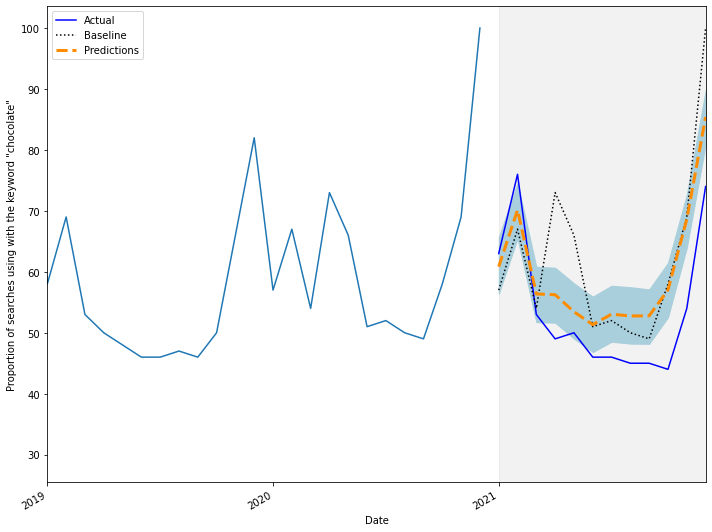

In [52]:
fig, ax = plt.subplots()

ax.plot(train['y'])
ax.plot(test['y'], 'b-', label='Actual')
ax.plot(test['baseline'], 'k:', label='Baseline')
ax.plot(test['yhat'], color='darkorange', ls='--', lw=3, label='Predictions')

ax.set_xlabel('Date')
ax.set_ylabel('Proportion of searches using with the keyword "chocolate"')

ax.axvspan(204, 215, color='#808080', alpha=0.1)

ax.legend(loc='best')

plt.xticks(np.arange(0, 215, 12), np.arange(2004, 2022, 1))
plt.fill_between(x=test.index, y1=test['yhat_lower'], y2=test['yhat_upper'], color='lightblue')
plt.xlim(180, 215)

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures/CH19_F15_peixeiro.png', dpi=300)

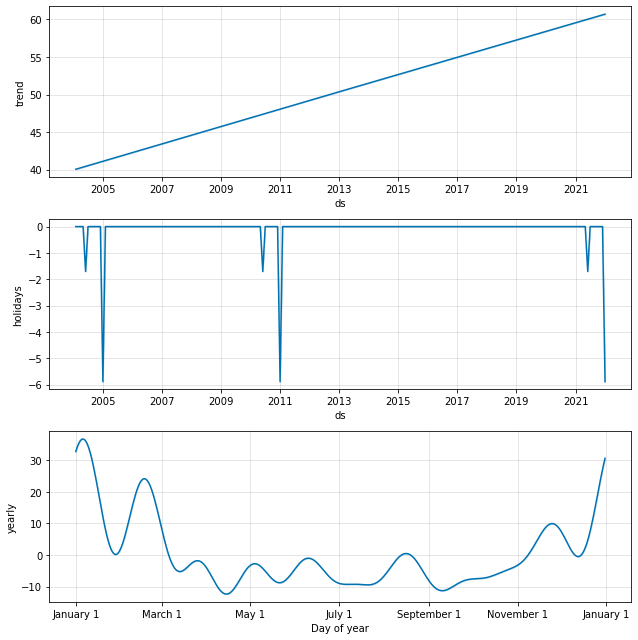

In [53]:
prophet_components_fig = m.plot_components(forecast)

plt.savefig('figures/CH19_F16_peixeiro.png', dpi=300)

### 19.5.2 Experiment: Can SARIMA do better? 

In [54]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

In [55]:
ad_fuller_result = adfuller(df['y'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.0341743396012615
p-value: 0.2717927133166884


In [56]:
y_diff = np.diff(df['y'], n=1)

ad_fuller_result = adfuller(y_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -7.034710505102185
p-value: 6.058003360042329e-10


$d=1$, $D=0$ and $m=12$

In [57]:
def optimize_SARIMAX(endog: Union[pd.Series, list], exog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog,
                exog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [58]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

order_list = list(product(ps, qs, Ps, Qs))

d = 1
D = 0
s = 12

In [13]:
SARIMA_result_df = optimize_SARIMAX(train['y'], None, order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to conver

D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to conver

,"(p,q,P,Q)",AIC
0,"(1, 0, 1, 3)",143.508936
1,"(1, 1, 1, 1)",1127.746591
2,"(1, 1, 2, 1)",1129.725199
3,"(1, 1, 1, 2)",1129.725695
4,"(0, 2, 1, 1)",1130.167369
...,...,...
244,"(1, 2, 0, 0)",1570.730422
245,"(2, 1, 0, 0)",1570.732139
246,"(0, 1, 0, 0)",1570.979692
247,"(0, 2, 0, 0)",1571.866177


In [59]:
SARIMA_model = SARIMAX(train['y'], order=(1,1,1), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

print(SARIMA_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -558.873
Date:                            Mon, 17 Jan 2022   AIC                           1127.747
Time:                                    18:49:24   BIC                           1144.313
Sample:                                         0   HQIC                          1134.449
                                            - 204                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3578      0.088      4.050      0.000       0.185       0.531
ma.L1         -0.8937      0.059   

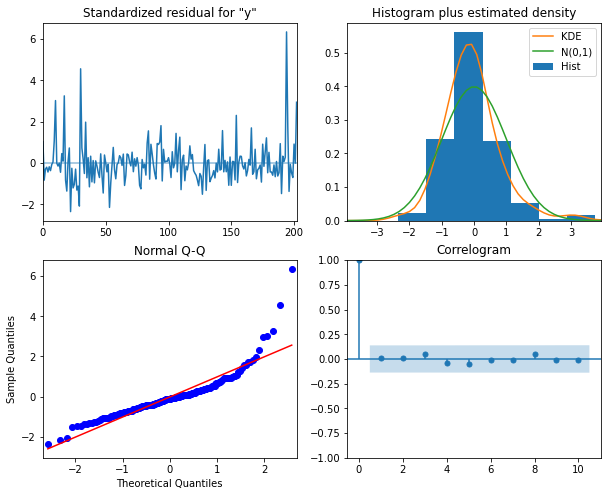

In [60]:
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

plt.savefig('figures/CH19_F17_peixeiro.png', dpi=300)

In [48]:
residuals = SARIMA_model_fit.resid

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

[0.04409011 0.09011278 0.1847877  0.23425832 0.23135272 0.28774165
 0.39040176 0.48645419 0.50440207 0.2586877 ]


In [49]:
test

,ds,y,yhat,yhat_lower,yhat_upper,baseline
204,2021-01-31,63,60.845802,56.338956,65.342775,57
205,2021-02-28,76,70.135408,65.469304,74.583319,67
206,2021-03-31,53,56.368339,51.827529,60.882931,54
207,2021-04-30,49,56.241079,51.966680,60.699396,73
208,2021-05-31,50,53.444825,48.937219,57.773875,66
209,2021-06-30,46,51.334864,46.670968,55.490750,51
210,2021-07-31,46,53.050394,48.120320,57.571373,52
211,2021-08-31,45,52.754099,47.994250,57.173712,50
212,2021-09-30,45,52.782397,47.987262,57.235871,49
213,2021-10-31,44,57.029019,52.456188,61.926663,58


In [50]:
SARIMA_pred = SARIMA_model_fit.get_prediction(204, 215).predicted_mean

test['SARIMA_pred'] = SARIMA_pred

test

,ds,y,yhat,yhat_lower,yhat_upper,baseline,SARIMA_pred
204,2021-01-31,63,60.845802,56.338956,65.342775,57,66.620586
205,2021-02-28,76,70.135408,65.469304,74.583319,67,74.241277
206,2021-03-31,53,56.368339,51.827529,60.882931,54,59.780433
207,2021-04-30,49,56.241079,51.966680,60.699396,73,60.506125
208,2021-05-31,50,53.444825,48.937219,57.773875,66,58.463521
209,2021-06-30,46,51.334864,46.670968,55.490750,51,53.726654
210,2021-07-31,46,53.050394,48.120320,57.571373,52,55.011789
211,2021-08-31,45,52.754099,47.994250,57.173712,50,54.323061
212,2021-09-30,45,52.782397,47.987262,57.235871,49,54.603150
213,2021-10-31,44,57.029019,52.456188,61.926663,58,59.557023


In [51]:
SARIMA_mae = mean_absolute_error(test['y'], test['SARIMA_pred'])

print(SARIMA_mae)

10.091261910853822
